In [1]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.86  Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 23.3 GB RAM, 30.3/476.9 GB disk)


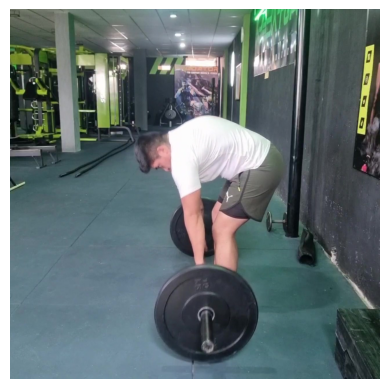

In [3]:
#path0='/content/46_051..jpg'
path0= 'D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_incorrecto/columna1_incorrecto/columna1_incorrecto_000011.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [4]:
path0= 'D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_incorrecto/columna1_incorrecto/columna1_incorrecto_000011.jpg'
model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')  # load an official model
# Predict with the model
results = model.track(path0,show =False, imgsz=[640, 640] )


image 1/1 D:\InteligenciaArtificial3\Datasets\peso_muerto\columna_incorrecto\columna1_incorrecto\columna1_incorrecto_000011.jpg: 640x640 1 person, 24.0ms
Speed: 12.4ms preprocess, 24.0ms inference, 281.4ms postprocess per image at shape (1, 3, 640, 640)


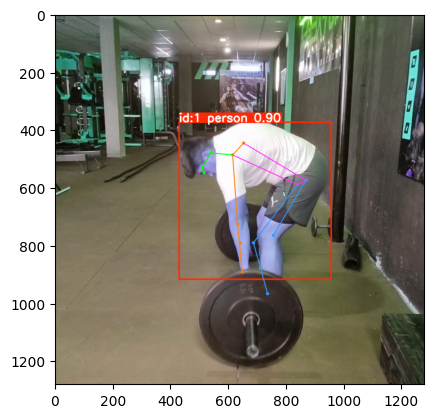

In [5]:
annotated_frame = results[0].plot()
plt.imshow(annotated_frame)#, cv2.COLOR_BGR2RGB)
plt.show()

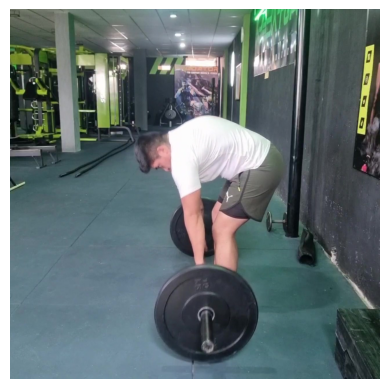

In [6]:
path0='D:/InteligenciaArtificial3/Datasets/peso_muerto/columna_incorrecto/columna1_incorrecto/columna1_incorrecto_000011.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [7]:
print(len(results[0].boxes))

1


In [8]:
BOX=pd.DataFrame(columns=range(7))
for i in range(len(results)):
    arri = pd.DataFrame(results[0].boxes.data.cpu()).astype(float)  # Copiar a la CPU antes de convertir a NumPy
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','id','confidence','class','']
display(BOX)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12276\800592531.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  BOX=pd.concat([BOX,arri],axis=0)


x           y          x2          y2   id  confidence  class     
0  429.450928  374.684082  955.881592  917.437744  1.0    0.897543    0.0  0.0

In [9]:
a=len(results[0].boxes)
print(a)
for i in range(a):
  if results[0].boxes.id[i] == 1:
    points=results[i].keypoints[i].xyn.data.cpu().numpy()
    ls=[]
    matriz_np = np.array(points)
    matriz_aplanada_np = matriz_np.flatten()
    valor=matriz_aplanada_np.tolist()
    ls.append(valor)
    print(ls)

1
[[0.40311774611473083, 0.42887336015701294, 0.3979446589946747, 0.41462603211402893, 0.0, 0.0, 0.4212356507778168, 0.375414103269577, 0.0, 0.0, 0.4799617826938629, 0.38103094696998596, 0.5096555352210999, 0.34893375635147095, 0.4931941628456116, 0.5671592354774475, 0.0, 0.0, 0.5058696866035461, 0.6976019740104675, 0.5011305809020996, 0.6192570924758911, 0.6552059054374695, 0.461470365524292, 0.6783654689788818, 0.4492378830909729, 0.5362302660942078, 0.6185418963432312, 0.5906214118003845, 0.5981597900390625, 0.574475109577179, 0.7559974789619446, 0.0, 0.0]]


In [10]:
df = pd.DataFrame(ls)
print(df)
df.to_csv("prueba"+".txt")

         0         1         2         3    4    5         6         7    8   \
0  0.403118  0.428873  0.397945  0.414626  0.0  0.0  0.421236  0.375414  0.0   

    9   ...        24        25       26        27        28       29  \
0  0.0  ...  0.678365  0.449238  0.53623  0.618542  0.590621  0.59816   

         30        31   32   33  
0  0.574475  0.755997  0.0  0.0  

[1 rows x 34 columns]


In [24]:
import os
import cv2

# Directorio principal que contiene subcarpetas con imágenes
directorio_principal = "D:/InteligenciaArtificial3/Datasets/peso_muerto/extension_correcto"

# Directorio donde se guardarán los resultados
directorio_resultados = "D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_correcto"
resultados_carpeta_actual = []
# Load the YOLOv8 model
for carpeta in os.listdir(directorio_principal):
    print("entro",carpeta)
    carpeta_actual = os.path.join(directorio_principal, carpeta)
    if os.path.isdir(carpeta_actual):
        # Crear una nueva instancia del modelo YOLO para cada carpeta
        model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')
        
        # Carpeta donde se guardarán los resultados para esta carpeta
        carpeta_resultados = os.path.join(directorio_resultados, carpeta+"_resultados")
        os.makedirs(carpeta_resultados, exist_ok=True)
        
        # Procesar cada imagen en la carpeta actual
        for archivo in os.listdir(carpeta_actual):
            ruta_archivo = os.path.join(carpeta_actual, archivo)
            # Leer el fotograma del archivo
            frame = cv2.imread(ruta_archivo)

            # Run YOLO tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True)
            # Verificar si hay detecciones antes de acceder a results[0].boxes
            if results[0].boxes is None or results[0].boxes.conf is None:
                print(f"No se detectaron objetos en {archivo}, saltando...")
                continue  # Saltar esta imagen y pasar a la siguiente

            a = len(results[0].boxes)
            print(f"Detecciones en {archivo}: {a}")
            for i in range(a):
                # Cambiado para filtrar por confianza >= 0.70 en lugar de id específico
                if results[0].boxes.conf[i] >= 0.80:
                    keypoints_de_interes = results[0].keypoints[i].xyn.data.cpu().numpy()
                    matriz_np = np.array(keypoints_de_interes)
                    matriz_aplanada_np = matriz_np.flatten()
                    valor = matriz_aplanada_np.tolist()
                    resultados_carpeta_actual.append(valor)
            # Visualize the results on the frame
            annotated_frame = results[0].plot()
            # Guardar el resultado en la carpeta 'malos_resultados' específica para esta carpeta
            cv2.imwrite(os.path.join(carpeta_resultados, archivo), annotated_frame)

# Informar que la operación ha finalizado
print("Proceso completado.")


entro extension10_correcto

0: 640x640 1 person, 57.9ms
Speed: 7.9ms preprocess, 57.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_correcto_000010.jpg: 1

0: 640x640 1 person, 56.8ms
Speed: 6.8ms preprocess, 56.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_correcto_000011.jpg: 1

0: 640x640 1 person, 53.4ms
Speed: 5.6ms preprocess, 53.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_correcto_000012.jpg: 1

0: 640x640 1 person, 53.4ms
Speed: 6.1ms preprocess, 53.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_correcto_000013.jpg: 1

0: 640x640 1 person, 53.3ms
Speed: 5.4ms preprocess, 53.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_correcto_000014.jpg: 1

0: 640x640 1 person, 26.5ms
Speed: 4.4ms preprocess, 26.5ms inference, 2.2ms postprocess per

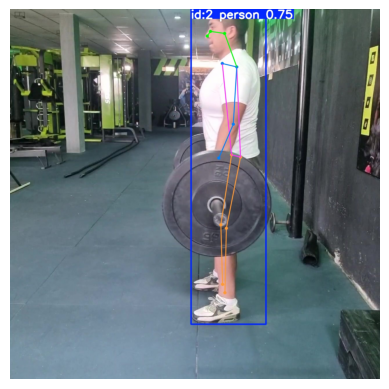

In [25]:
path0= 'D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_correcto/extension1_correcto_resultados/extension1_correcto_000040.jpg'
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [26]:
b=resultados_carpeta_actual
print(len(b))
df = pd.DataFrame(resultados_carpeta_actual)
print(df)

8191
            0         1         2         3    4    5         6         7   \
0     0.356919  0.328679  0.358458  0.317921  0.0  0.0  0.391089  0.303688   
1     0.356479  0.320451  0.358768  0.308626  0.0  0.0  0.391405  0.292820   
2     0.363459  0.306684  0.365295  0.293703  0.0  0.0  0.396123  0.276648   
3     0.357559  0.293427  0.360923  0.281457  0.0  0.0  0.395625  0.267105   
4     0.362418  0.280772  0.364411  0.270318  0.0  0.0  0.397987  0.257621   
...        ...       ...       ...       ...  ...  ...       ...       ...   
8186  0.449977  0.117046  0.457704  0.105224  0.0  0.0  0.494775  0.109069   
8187  0.450554  0.117494  0.458452  0.105599  0.0  0.0  0.495782  0.109545   
8188  0.451454  0.118314  0.459015  0.106364  0.0  0.0  0.495978  0.109544   
8189  0.451262  0.118684  0.458896  0.106838  0.0  0.0  0.495935  0.110348   
8190  0.451522  0.118620  0.459123  0.106788  0.0  0.0  0.496133  0.110580   

       8    9   ...        24        25        26        2

In [27]:
df.to_csv("extension_correctos"+".txt")

In [30]:
import os
import cv2
from ultralytics import YOLO

# Directorio principal que contiene subcarpetas con imágenes
directorio_principal = "D:/InteligenciaArtificial3/Datasets/peso_muerto/extension_incorrecto"

# Directorio donde se guardarán los resultados
directorio_resultados = "D:/InteligenciaArtificial3/Datasets/resultados_peso_muerto/resultado_extension_incorrecto"
resultados_carpeta_actual2 = []
# Load the YOLOv8 model
for carpeta in os.listdir(directorio_principal):
    print("entro",carpeta)
    carpeta_actual = os.path.join(directorio_principal, carpeta)
    if os.path.isdir(carpeta_actual):
        # Crear una nueva instancia del modelo YOLO para cada carpeta
        model = YOLO('D:/InteligenciaArtificial3/Modelos/yolo11n-pose.pt')
        
        # Carpeta donde se guardarán los resultados para esta carpeta
        carpeta_resultados = os.path.join(directorio_resultados, carpeta+"_resultados")
        os.makedirs(carpeta_resultados, exist_ok=True)
        
        # Procesar cada imagen en la carpeta actual
        for archivo in os.listdir(carpeta_actual):
            ruta_archivo = os.path.join(carpeta_actual, archivo)
            # Leer el fotograma del archivo
            frame = cv2.imread(ruta_archivo)

            # Run YOLO tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True)
            # Verificar si hay detecciones antes de acceder a results[0].boxes
            if results[0].boxes is None or results[0].boxes.id is None:
                print(f"No se detectaron objetos en {archivo}, saltando...")
                continue  # Saltar esta imagen y pasar a la siguiente

            a = len(results[0].boxes)
            print(f"Detecciones en {archivo}: {a}")
            for i in range(a):
                if results[0].boxes.conf[i] >= 0.70:
                    keypoints_de_interes = results[0].keypoints[i].xyn.data.cpu().numpy()
                    matriz_np = np.array(keypoints_de_interes)
                    matriz_aplanada_np = matriz_np.flatten()
                    valor = matriz_aplanada_np.tolist()
                    resultados_carpeta_actual2.append(valor)
            # Visualize the results on the frame
            annotated_frame = results[0].plot()
            # Guardar el resultado en la carpeta 'malos_resultados' específica para esta carpeta
            cv2.imwrite(os.path.join(carpeta_resultados, archivo), annotated_frame)

# Informar que la operación ha finalizado
print("Proceso completado.")


entro extension10_incorrecto

0: 640x640 1 person, 60.4ms
Speed: 6.3ms preprocess, 60.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_incorrecto_000010.jpg: 1

0: 640x640 1 person, 53.8ms
Speed: 6.2ms preprocess, 53.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_incorrecto_000011.jpg: 1

0: 640x640 1 person, 48.4ms
Speed: 5.6ms preprocess, 48.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_incorrecto_000012.jpg: 1

0: 640x640 1 person, 28.5ms
Speed: 4.2ms preprocess, 28.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_incorrecto_000013.jpg: 1

0: 640x640 1 person, 29.3ms
Speed: 6.2ms preprocess, 29.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
Detecciones en extension10_incorrecto_000014.jpg: 1

0: 640x640 1 person, 27.9ms
Speed: 4.0ms preprocess, 27.9ms inference, 2.2ms pos

In [31]:
df = pd.DataFrame(resultados_carpeta_actual2)
print(df)
df.to_csv("extension_incorrectos"+".txt")

            0         1         2         3    4    5         6         7   \
0     0.391850  0.372188  0.385310  0.359379  0.0  0.0  0.396757  0.322731   
1     0.398478  0.358182  0.391634  0.346314  0.0  0.0  0.400521  0.311103   
2     0.392079  0.339741  0.387275  0.329440  0.0  0.0  0.400860  0.297073   
3     0.389036  0.323154  0.384196  0.312567  0.0  0.0  0.399537  0.281262   
4     0.393603  0.291725  0.389743  0.280177  0.0  0.0  0.415097  0.247293   
...        ...       ...       ...       ...  ...  ...       ...       ...   
8618  0.554118  0.152999  0.565016  0.144389  0.0  0.0  0.588606  0.164265   
8619  0.555960  0.158719  0.566280  0.150209  0.0  0.0  0.589204  0.167144   
8620  0.555320  0.164887  0.566412  0.156671  0.0  0.0  0.592230  0.172412   
8621  0.556381  0.167099  0.568006  0.159293  0.0  0.0  0.594742  0.175604   
8622  0.556431  0.170276  0.567930  0.161963  0.0  0.0  0.594722  0.176947   

       8    9   ...        24        25        26        27    